<h1> 
High-order Tensor-Train Finite Volume Methods for Shallow Water Equations
</h1>

M. Engin Danis, Duc P. Truong, Derek DeSantis, Jeremy Lilly, Mark R. Petersen, Kim Ø. Rasmussen, and Boian S. Alexandrov

https://doi.org/10.1175/MWR-D-24-0165.1

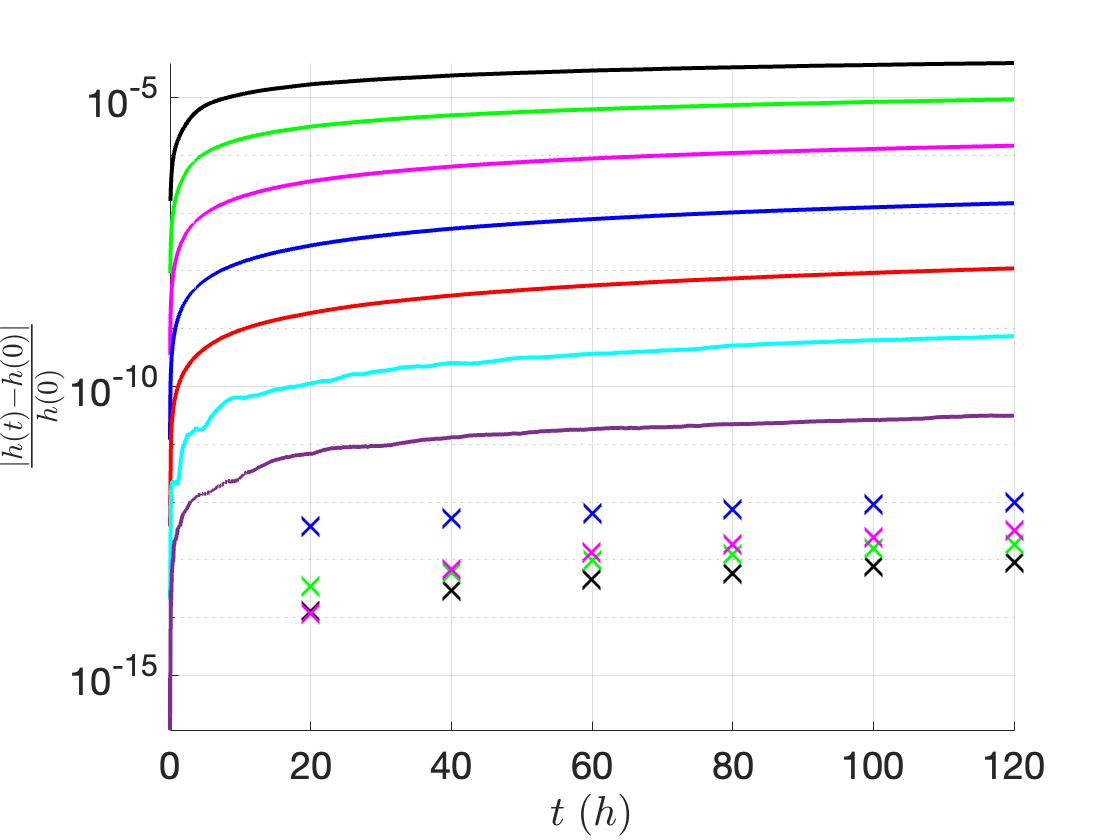

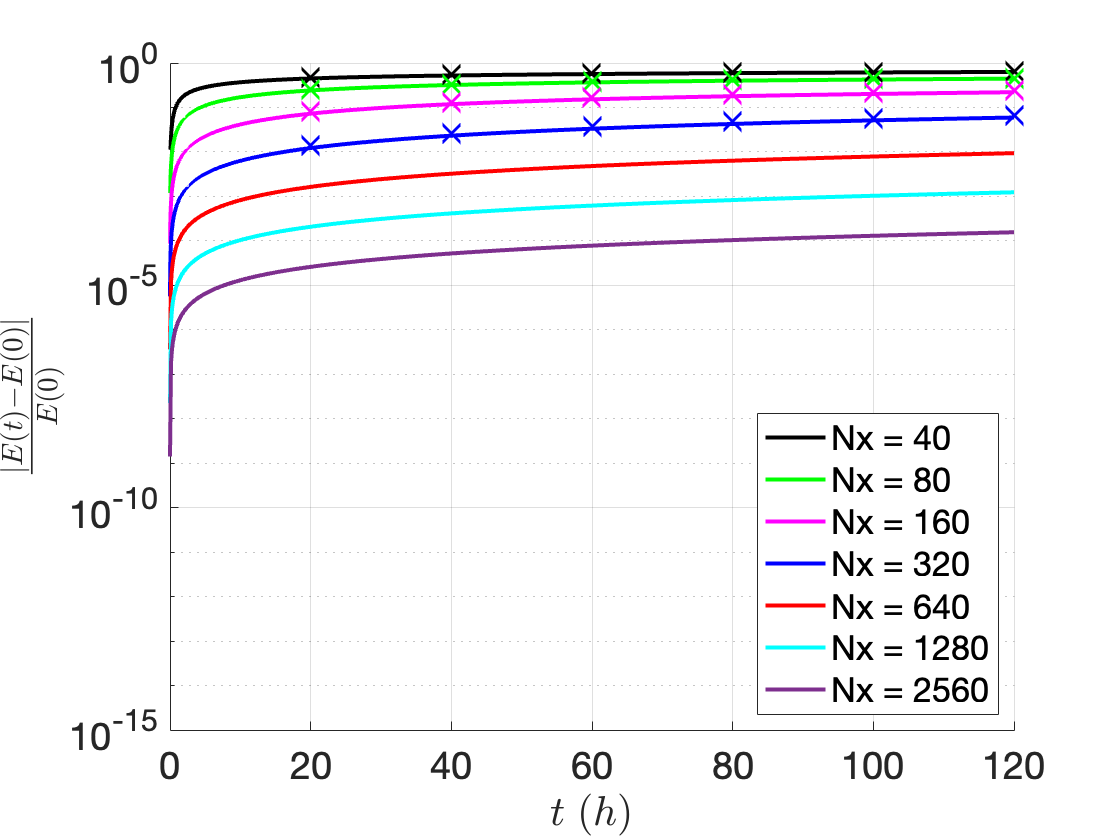

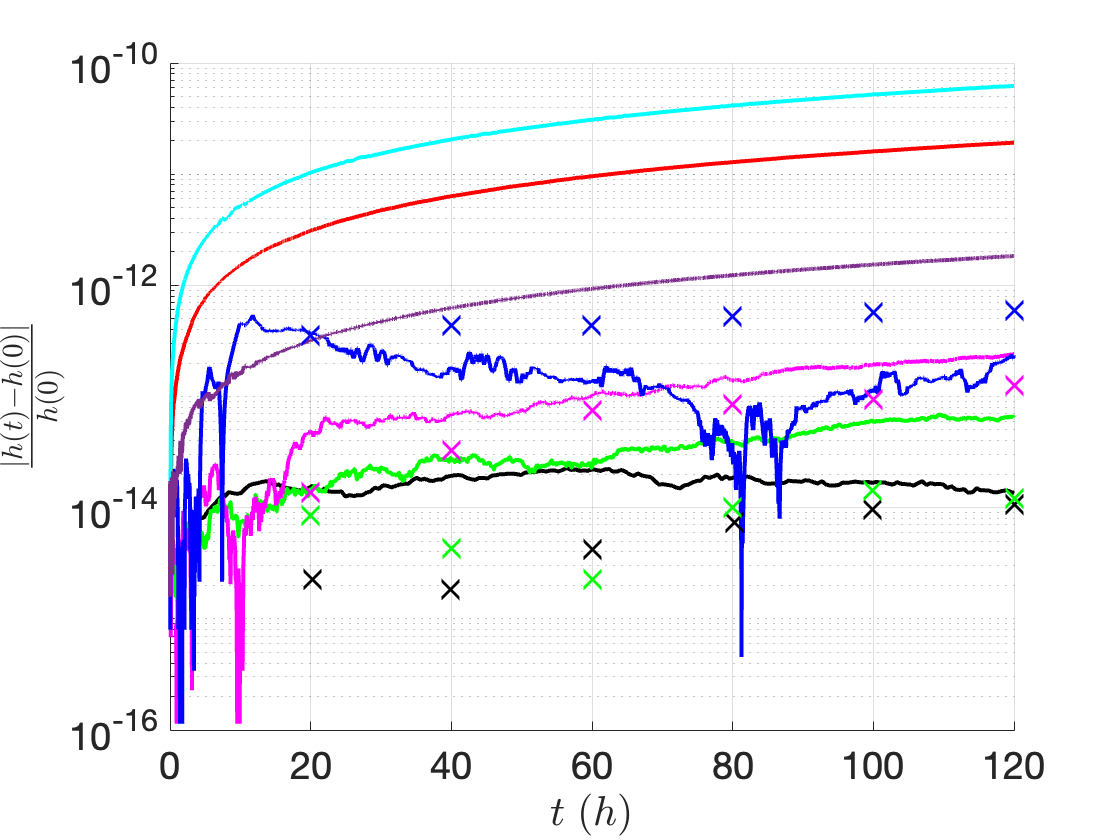

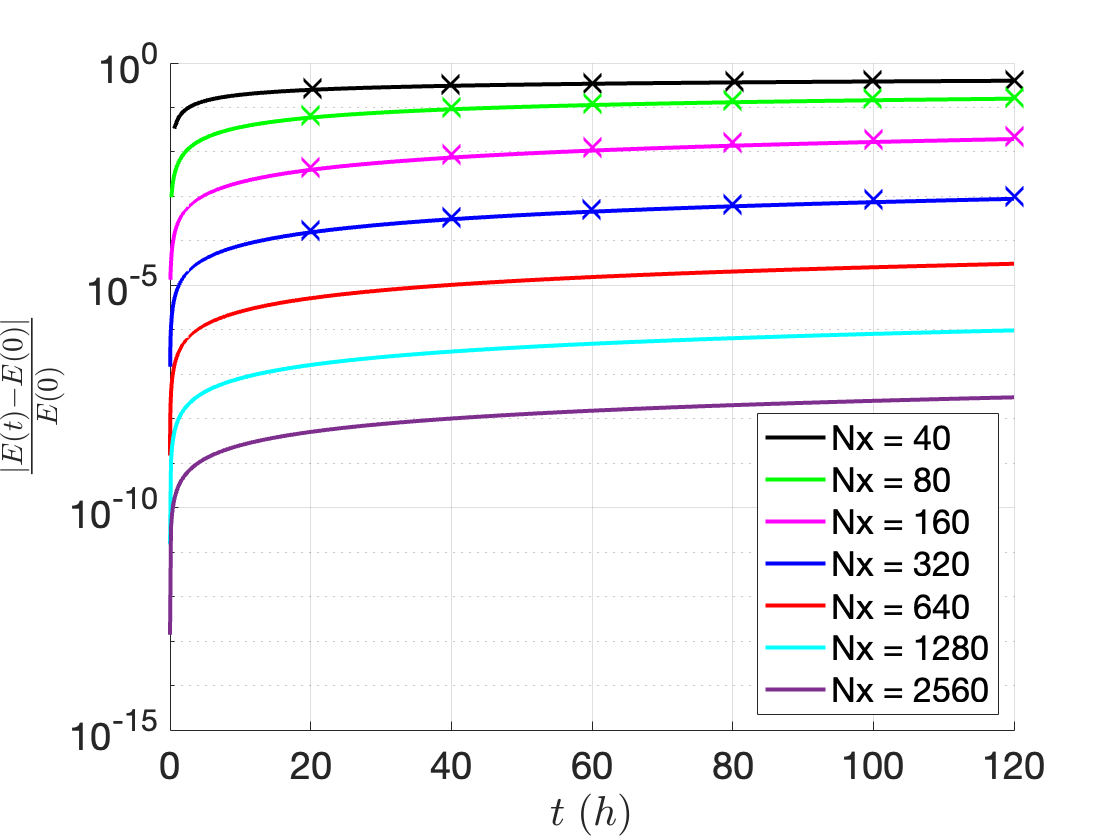

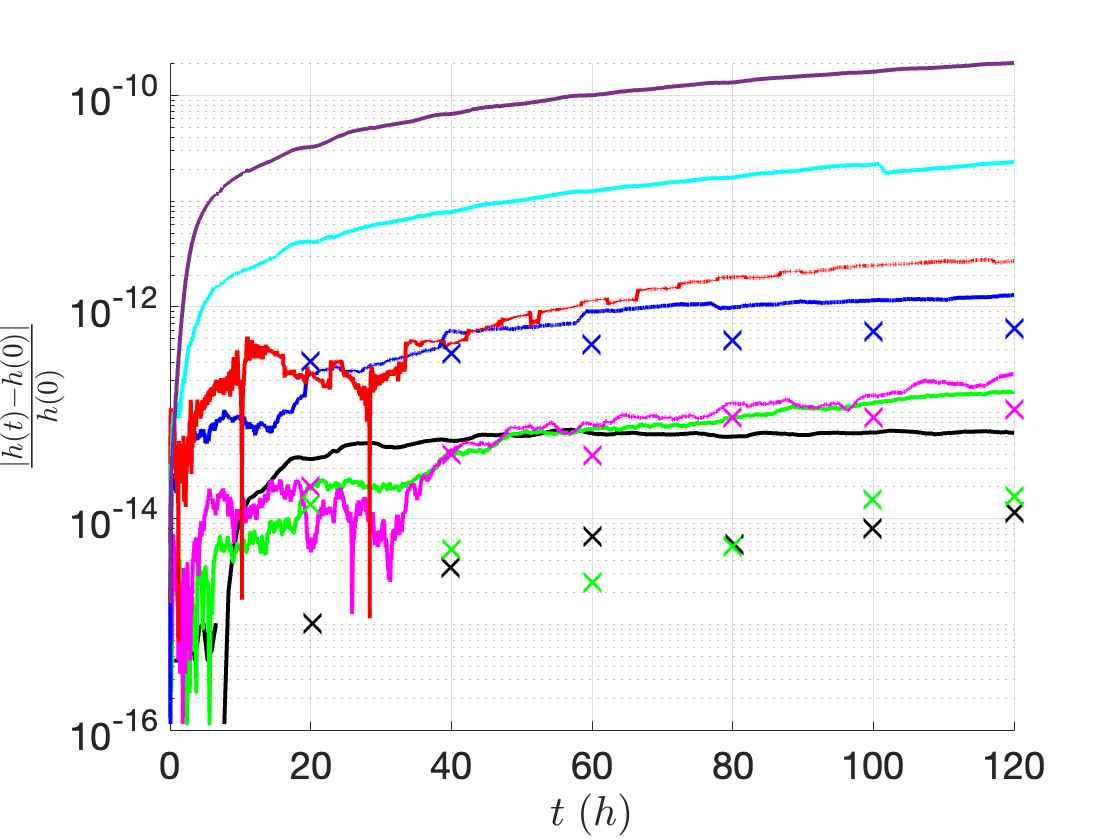

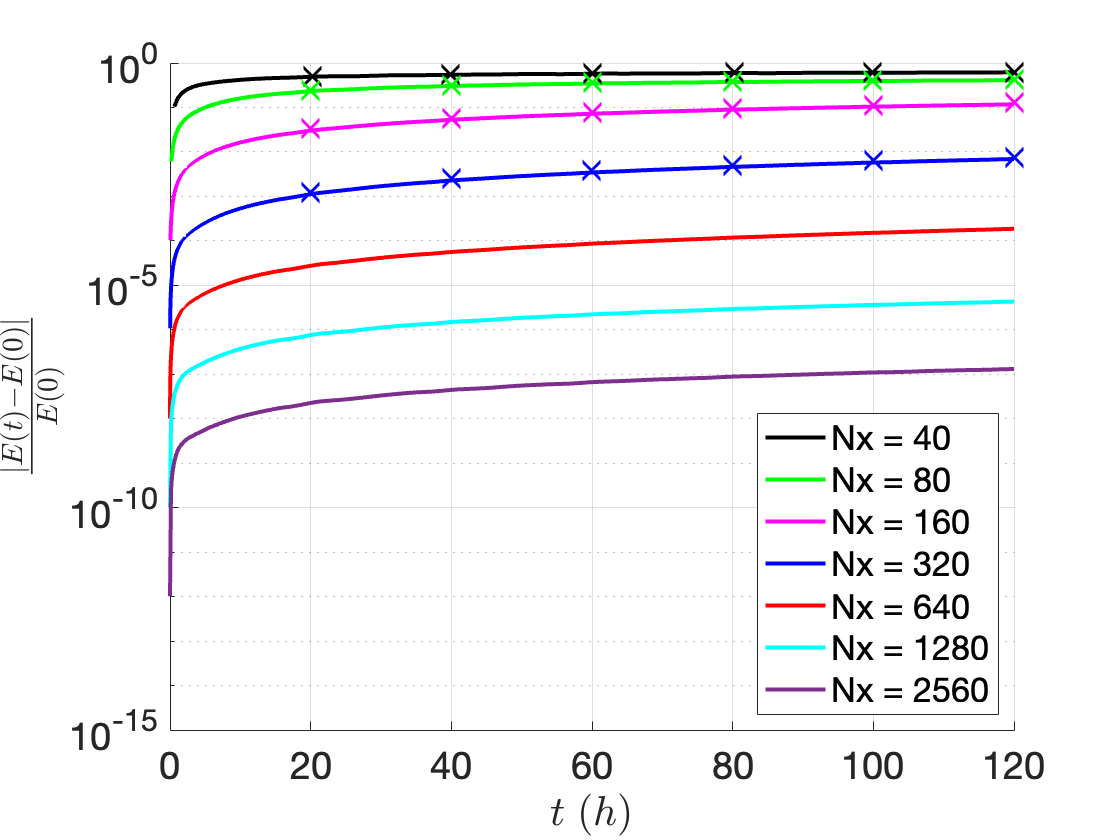

In [5]:
fig_path = pwd + "/figures";
%
plotter_conserr(fig_path);

function plotter_conserr(fig_path)
    %
    colors = {"k","g","m","b","r","c","#7E2F8E"};
    % 
    ReconList = {"Upwind3", "Upwind5", "WENO5"};
    %
    N  = 20*2.^[1:7];
    %
    sim_types = {"tt","ft"};
    %
    for recon_idx = 1:length(ReconList)
        %
        im1=figure;
        im2=figure;
        %
        Recon = ReconList{recon_idx};
        %
        for sim_idx = 1:length(sim_types)
            %
            if(sim_idx==1)
                lvl_end=7;
                style  = "-";
                mstyle = "none";
            else
                lvl_end=4;
                style  = "none";
                mstyle = "x";
            end
            %
            sim_type = sim_types{sim_idx};
            %
            cnt = 1;
            %
            for lvl=1:lvl_end
                %
                res = load(sim_type+"/benchmark-results/"+Recon+"/"+"conservation-err-lvl="+lvl+".txt");
                %
                t = res(:,1)/3600;
                dh = abs(res(:,2));
                dE = abs(res(:,3));
                %
                if(sim_idx==2) 
                    %
                    Nsize = length(t);
                    %
                    idx1  = 1;
                    [~,idx2] = min(abs(t-20));
                    [~,idx3] = min(abs(t-40));
                    [~,idx4] = min(abs(t-60));
                    [~,idx5] = min(abs(t-80));
                    [~,idx6] = min(abs(t-100));
                    idx7 = Nsize;
                    %
                    t  = t([idx1 idx2 idx3 idx4 idx5 idx6 idx7]);
                    dh = dh([idx1 idx2 idx3 idx4 idx5 idx6 idx7]);
                    dE = dE([idx1 idx2 idx3 idx4 idx5 idx6 idx7]);
                %
                end
                %
                set(0,"CurrentFigure",im1);
                hold on;
                plot(t,dh,"LineWidth",2,"LineStyle",style,"Color",colors{cnt},"Marker",mstyle,"MarkerFaceColor","auto","MarkerSize",10);
                hold off;
                %
                set(0,"CurrentFigure",im2);
                hold on;
                plot(t,dE,"LineWidth",2,"LineStyle",style,"Color",colors{cnt},"Marker",mstyle,"MarkerFaceColor","auto","MarkerSize",10);
                hold off;
                %
                cnt = cnt+1;
                %
            end
            %
            set(0,"CurrentFigure",im1);
            set(gca,"YScale","log");
            xlabel("$t\;(h)$","Interpreter","latex");
            ylabel("$\frac{|h(t)-h(0)|}{h(0)}$","Interpreter","latex");
            set(gca,"FontSize",19);
            grid on;
            saveas(im1,sprintf("%s/mass-err:%s",fig_path,Recon),"png");
            %
            set(0,"CurrentFigure",im2);
            set(gca,"YScale","log");
            xlabel("$t\;(h)$","Interpreter","latex");
            ylabel("$\frac{|E(t)-E(0)|}{E(0)}$","Interpreter","latex");
            set(gca,"FontSize",19);
            ylim([1e-15 1])
            grid on;
            %
            if(sim_type=="tt")
                %
                legs = cell(1,length(N));
                for i=1:length(N)
                    legs{i} = "Nx = " + int2str(N(i));
                end
                L=legend(legs,"Location","SE");
                %
                L.AutoUpdate = 'off'; 
                %
            end
            %
            saveas(im2,sprintf("%s/energy-err:%s",fig_path,Recon),"png");
            %
        end
        %
        %close all;
        %
    end
end
%